In [ ]:
#i tried using multiple lists at first in which the data of the same object/user was stored
#at the same index of each list and mentally stressful to handle
#parallel lists organized by indexing was causing problems. chatgpt suggested i use dictionaries and then i did

In [ ]:
total_api_requests = 0
endpoint_data = {}
users_by_year = {}
algorithm_usage = {}
total_timetables = 0
generation_count = 0
http_response = {}

with open(r"C:\Users\Asus\Desktop\CodingPrac\BackendTaskCC\timetable.log",'r') as logsfile: #please change the path accordingly
    readfile = logsfile.readlines()

    for line in readfile:
        words = line.split()

        #Total API requests
        if ("GET" in line or "POST" in line):
            total_api_requests += 1
            endpoint = words[4]
            response_time_str = words[6]

            if endpoint not in endpoint_data:
                endpoint_data[endpoint] = {'count': 0,'yearofstud': {}, 'total_time_ms': 0, 'max_time_ms': 0}
                                                #yearofstud added later
            endpoint_data[endpoint]['count'] += 1

            #Response time
            try:
                resp = 0
                if 'ms' in response_time_str:
                    time_value_ms = float(response_time_str.replace('ms', ''))
                elif 'µs' in response_time_str:
                    resp = float(response_time_str.replace('µs', '')) / 1000

                endpoint_data[endpoint]['total_time_ms'] += resp

                if resp > endpoint_data[endpoint]['max_time_ms']:
                    endpoint_data[endpoint]['max_time_ms'] = resp
            except ValueError:
                pass
                
                #HTTP Response
                http_code = words[5]
                http_response[http_code] = http_response.get(http_code, 0) + 1
                # if http_code not in http_response:
                #     http_response[http_code] = 1 #count
                # if http_code in http_response:
                #     http_response[http_code] += 1

        if "router:" in line:
            endpoint = words[4]
            if ('ms' in words[-1]) or ('µs' in words[-1]):
                response_time_str = words[-1]

            if endpoint not in endpoint_data:
                endpoint_data[endpoint] = {'count': 0,'yearofstud': {}, 'total_time_ms': 0, 'max_time_ms': 0}
                                                    #pls dont break
            endpoint_data[endpoint]['count'] += 1

            #Response time
            try:
                resp = 0
                if 'ms' in response_time_str:
                    resp = float(response_time_str.replace('ms', ''))
                elif 'µs' in response_time_str:
                    resp = float(response_time_str.replace('µs', '')) / 1000

                endpoint_data[endpoint]['total_time_ms'] += resp

                if time_value_ms > endpoint_data[endpoint]['max_time_ms']:
                    endpoint_data[endpoint]['max_time_ms'] = resp
            except ValueError:
                pass

            #Impelminting yearwise count here
            if words[-1].startswith('[20') and words[-1].endswith(']'):
                user_id = words[-1][1:-1]

                year = user_id[0:4]
                #to not cause error due to empty dict of 'GET','POST'
                # if (endpoint_data[endpoint]['yearofstud']) and (year not in endpoint_data[endpoint]['yearofstud']):
                #     endpoint_data[endpoint]['yearofstud'][year] = 1 #review later
                # elif year in endpoint_data[endpoint]['yearofstud']:
                #     endpoint_data[endpoint]['yearofstud'][year] += 1
            
                endpoint_data[endpoint].setdefault('yearofstud', {})
                endpoint_data[endpoint]['yearofstud'][year] = endpoint_data[endpoint]['yearofstud'].get(year, 0) + 1
                                                                        
                    #counting also in separate lisst to print later??
                if year not in users_by_year:
                    users_by_year[year] = []
                if user_id not in users_by_year[year]:
                    users_by_year[year].append(user_id)
            
            #Uniuqe users and yearwise count
            # for part in words:
            #     if part.startswith('[20') and part.endswith(']'):
            #         user_id = part[1:-1]
            #         year = part[1:5]
            #         if year not in users_by_year:
            #             users_by_year[year] = []
            #         if user_id not in users_by_year[year]:
            #             users_by_year[year].append(user_id)
            #         break

        #Timetables
        if "Generation Complete: Found" in line:
            try:
                timetables_found = int(words[words.index("Found") + 1])
                total_timetables += timetables_found
                generation_count += 1
            except (ValueError, IndexError):
                pass

        if "Using Heuristic Backtracking Strategy" in line:
            algorithm_usage['Backtracking'] = algorithm_usage.get('Backtracking', 0) + 1 #returns 0 if key not found
        elif "Using Iterative Random Sampling" in line:
            algorithm_usage['Iterative random sampling'] = algorithm_usage.get('Iterative random sampling', 0) + 1


In [39]:
#Output

print("--- Report Generation ---")

print("\nTotal API requests served: ",total_api_requests)

print("\n## HTTP Response Code")
for (i,j) in http_response.items():
    print("  - ",i,": ",j)

print("\n## Endpoint Popularity")
for endpoint, data in endpoint_data.items():
    print("  - ",endpoint,": ",data['count']," requests")

print("\n## Performance Metrics")
for endpoint, data in endpoint_data.items():
    avg_time = 0
    if data['count'] > 0:
        avg_time = data['total_time_ms'] / data['count']
    print("  - Endpoint: ",endpoint)
    print("    - Average Response Time: ",avg_time, "ms")
    print("    - Max Response Time:",data['max_time_ms'],"ms")

print("\n## Users")
total_unique_users = sum(len(users) for users in users_by_year.values())
print("  - Total unique users: ",(total_unique_users))
print("  - Unique users by year:")
for year, users in users_by_year.items():
    print("    - " + year + ": ",(len(users))," users")

print("\n## Timetable Generation Insights")
avg_timetables = 0
if generation_count > 0:
    avg_timetables = total_timetables / generation_count
print("  - Total timetables generated: ",total_timetables)
print("  - Average timetables per generation: ",avg_timetables)
print("  - Algorithm Usage:")
for algo, count in algorithm_usage.items():
    print("    - " + algo + ": ",count," times")

--- Report Generation ---

Total API requests served:  61559

## HTTP Response Code
  -  200 :  52858
  -  404 :  5

## Endpoint Popularity
  -  /courses :  78026  requests
  -  /sections :  52149  requests
  -  /exam_clash :  2898  requests
  -  /generate :  9391  requests
  -  /list_huels :  3323  requests
  -  / :  170  requests
  -  /actuator/gateway/routes :  1  requests
  -  /v2/static/not.found :  2  requests
  -  /favicon.ico :  1  requests
  -  /geoserver/web/ :  1  requests

## Performance Metrics
  - Endpoint:  /courses
    - Average Response Time:  5.298221933932308 ms
    - Max Response Time: 387.036308 ms
  - Endpoint:  /sections
    - Average Response Time:  4.521875754108417 ms
    - Max Response Time: 336.018371 ms
  - Endpoint:  /exam_clash
    - Average Response Time:  0.0 ms
    - Max Response Time: 0 ms
  - Endpoint:  /generate
    - Average Response Time:  2.8334487755297633 ms
    - Max Response Time: 232.211363 ms
  - Endpoint:  /list_huels
    - Average Respons

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

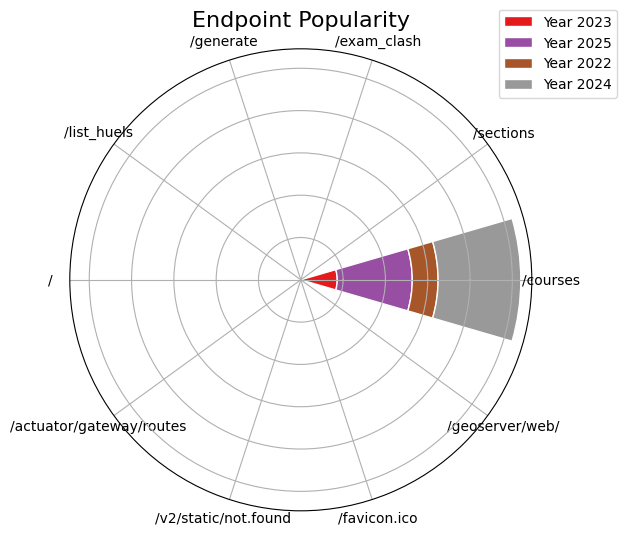

In [57]:
#This is incomplete and incorrect. i tried to make a circular bar chart but couldnt make it work
#seems like my main code is flawed and i may need to rewrite most of it.
#sorry for not being able to put up a decent task report

endpoints = list(endpoint_data.keys())
N = len(endpoints)

# Angles for each endpoint
angles = np.linspace(0, 2*np.pi, N, endpoint=False)

# Collect all unique years across endpoints
years = list({y for ep in endpoint_data.values() for y in ep['yearofstud'].keys()})

# Assign one color per year
colorslist = cm.Set1(np.linspace(0, 1, len(years)))

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

for i, ep in enumerate(endpoints):
    start = 0
    for k, year in enumerate(years):
        value = endpoint_data[ep]['yearofstud'].get(year, 0)
        ax.bar(
            angles[i],         
            value,             
            width=2*np.pi/N*0.9, 
            bottom=start,     
            color=colorslist[k],
            edgecolor='white'  
        )
        start += value

# Labels
ax.set_xticks(angles)
ax.set_xticklabels(endpoints, fontsize=10)
ax.set_yticklabels([])

# Legend for years
legend_labels = [f"Year {y}" for y in years]
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.title("Endpoint Popularity", fontsize=16)
plt.show()


In [13]:
#This was the logic i originally tried but it was highly error prone so i gave up on it and used dictionaries instead
#parallel lists organized by indexing was causing problems. chatgpt suggested i use dictionaries and then i did


# for line in readfile:
#     parts = line.split()
#     for word in parts:

#         if ('POST' in line) or ('GET' in line):
#             total_requests += 1

#         if '/'==word[0]: #checking for endpoints
#             if (word[1:] not in endpoint_list):
#                 endpoint_list.append(word[1:])
#                 endpoint_popularity[endpoint_list.index(word)] +=1

#                 #resp time
#                 if line[-1][-2:]=='µs':
#                     response_time_list[response_time_list.index(word)] += float(str(line[-1][0:-2]))/1000
#                     if float(str(line[-1][0:-2]))/1000 > (response_time_list[response_time_list.index(word)]):
#                         max_resp_list[response_time_list.index(word)] = float(str(line[-1][0:-2]))/1000
#                 elif line[-1][-2:]=='ms':
#                     response_time_list[response_time_list.index(word)] += float(str(line[-1][0:-2]))
#                     if float(str(line[-1][0:-2])) > (response_time_list[response_time_list.index(word)]):
#                         max_resp_list[response_time_list.index(word)] = float(str(line[-1][0:-2]))

#             if (word[1:] in endpoint_list):
#                 endpoint_popularity[response_time_list.index(word)] +=1

#                 #resp time
#                 if line[-1][-2:]=='µs':
#                     response_time_list[response_time_list.index(word)] += float(str(line[-1][0:-2]))/1000
#                     if float(str(line[-1][0:-2]))/1000 > (response_time_list[response_time_list.index(word)]):
#                         max_resp_list[response_time_list.index(word)] = float(str(line[-1][0:-2]))/1000
#                 elif line[-1][-2:]=='ms':
#                     response_time_list[response_time_list.index(word)] += float(str(line[-1][0:-2]))
#                     if float(str(line[-1][0:-2])) > (response_time_list[response_time_list.index(word)]):
#                         max_resp_list[response_time_list.index(word)] = float(str(line[-1][0:-2]))

#         if word[:-1]=='router':
#             if line[-1][1:-1] in unique_users:
#                 if line[-1][1:6] in yearwise_count:
#                     yearwise_count[line[-1][1:6]] += 1

#             else:
#                 unique_users.append(line[-1][1:-1])
#                 yearwise_count[line[-1][1:6]] = 1